In [ ]:
import numpy as np
import gensim
import csv
import matplotlib.pyplot as plt
import math

In [ ]:
modelR = gensim.models.KeyedVectors.load_word2vec_format("right_news.bin", binary=True)
modelL = gensim.models.KeyedVectors.load_word2vec_format("left_news.bin", binary=True)

In [ ]:
from wefe import WordEmbeddingModel
import gensim.downloader as api
from wefe.query import Query
from wefe.metrics.WEAT import WEAT
from wefe.datasets.datasets import load_weat

liberal_model = WordEmbeddingModel(modelL)
conservative_model = WordEmbeddingModel(modelR)

In [ ]:
word_sets= load_weat()

In [ ]:
weat = WEAT()

In [ ]:
def calc_weat_score(grp, terms, l1, l2, model):
    
    query = Query(grp,
              terms,
              l1,
              l2)
    
    result = weat.run_query(query,
                            model,
                            warn_not_found_words=False,
                            ggregate_results=True,
                            return_only_aggregation=True)
    
    return result

In [ ]:
#Written to read csv files
import csv

def read_csv(filename):
    terms = []
    with open(filename) as f:
        reader = csv.reader(f, delimiter=',')
        line_count = 0
        for row in reader:
            for r in row:
                terms += [r]
    return terms

In [ ]:
word_sets['male_terms'] = read_csv("group words/gender/Man.csv")
word_sets['female_terms'] = read_csv("group words/gender/Woman.csv")

word_sets['islam_terms'] = read_csv("group words/religion/Islam.csv")
word_sets['christianity_terms'] = read_csv("group words/religion/Christianity.csv")

word_sets['black_terms'] = ['african', 'black']

word_sets['white_terms'] = ['caucasian', 'white']

word_sets['asian_terms'] = ['asian']

word_sets['hispanic_terms'] = ['hispanic']

word_sets['lgbtq_terms'] = ['lesbian', 'gay', 'bisexual', 'queer', 'trans', 'transgender', 'homosexual', 'pansexual', 'asexual']
word_sets['straight_terms'] = ['cis', 'straight', 'heterosexual', 'cisgender']

word_sets['old_terms'] = ['old', 'aged', 'elderly', 'senior']
word_sets['young_terms'] = ['young', 'youthful']

In [ ]:
# Attribute groups

# Gender
gender_group = ([word_sets['male_terms'], word_sets['female_terms']], ["Male", "Female"])

# Religion
religion_group = ([word_sets['islam_terms'], word_sets['christianity_terms']], ["Islam", "Christianity"])

# Race
white_black_group = ([word_sets['white_terms'], word_sets['black_terms']], ["White", "Black"])
white_asian_group = ([word_sets['white_terms'], word_sets['asian_terms']], ["White", "Asian"])
white_hispanic_group = ([word_sets['white_terms'], word_sets['hispanic_terms']], ["White", "Hispanic"])
black_asian_group = ([word_sets['black_terms'], word_sets['asian_terms']], ["Black", "Asian"])
black_hispanic_group = ([word_sets['black_terms'], word_sets['hispanic_terms']], ["Black", "Hispanic"])

# Gender Identity and sexual orientation
lgbtq_straight_group = ([word_sets['lgbtq_terms'], word_sets['straight_terms']], ["LGBTQ", "Straight"])


# Age
old_young_group = ([word_sets['old_terms'], word_sets['young_terms']], ["Old", "Young"])

# All the groups
groups = [gender_group,
          religion_group,
          white_black_group,
          white_asian_group,
          white_hispanic_group,
          black_asian_group,
          black_hispanic_group,
          lgbtq_straight_group,
          old_young_group]



In [ ]:
# Import metric words
word_sets['strong_terms'] = ['power', 'strong', 'confident', 'dominant', 'potent', 'command', 'assert', 
                             'loud', 'bold', 'succeed', 'triumph', 'leader', 'shout', 'dynamic', 'winner']
word_sets['weak_terms'] = ['weak', 'surrender', 'timid', 'vulnerable', 'weakness', 'wispy', 'withdraw', 
                           'yield', 'failure', 'shy', 'follow', 'lose', 'fragile', 'afraid', 'loser']

word_sets['normal_terms'] = ['correct', 'correctness', 'legitimate', 'logical', 'valid', 'legal',
                             'normal', 'natural', 'justified', 'good', 'rightful', 'right', 'accepted']
word_sets['abnormal_terms'] = ['bad', 'wrong', 'deficient', 'dissatisfactory', 'disgusting', 'lame',
                               'lousy', 'unacceptable', 'unsatisfactory', 'illegal', 'weird', 'abnormal']

word_sets['intelligence_terms'] = ['precocious', 'resourceful', 'inquisitive', 'genius', 'inventive', 
                                   'astute', 'adaptable', 'reflective', 'discerning', 'intuitive', 
                                   'inquiring', 'judicious', 'analytical', 'apt', 'venerable', 'imaginative',
                                   'shrewd', 'thoughtful', 'wise', 'smart', 'ingenious', 'clever', 'brilliant', 
                                   'logical', 'intelligent']
word_sets['appearance_terms'] = ['alluring', 'voluptuous', 'blushing', 'homely', 'plump', 'sensual',
                                 'gorgeous', 'slim', 'bald', 'athletic', 'fashionable', 'stout', 'ugly',
                                 'muscular', 'slender', 'feeble', 'handsome', 'healthy', 'attractive', 
                                 'fat','weak', 'thin', 'pretty', 'beautiful', 'strong']

In [ ]:
# Metrics Used

strong_weak_metric = ([word_sets['strong_terms'], word_sets['weak_terms']], ["Strong", "Weak"])

normal_abnormal_metric = ([word_sets['normal_terms'], word_sets['abnormal_terms']], ["Normal", "Abnormal"])

intelligence_appearance_metric = ([word_sets['intelligence_terms'], word_sets['appearance_terms']], ["Intelligence", "Appearance"])

In [ ]:
def plt_groups(groups, metrics, title):
        
    fig = plt.figure()
    ax = plt.axes()
    
    i = 0.75
    
    for g in groups:
        res = calc_weat_score(g[0], metrics[0], g[1], metrics[1], liberal_model)
        print("L:", res["query_name"], ":", res["result"])
        ax.bar(i + 0, res["result"], color='b', width= 0.5)

        res = calc_weat_score(g[0], metrics[0], g[1], metrics[1], conservative_model)
        print("C:", res["query_name"], ":", res["result"])
        ax.bar(i + 0.5, res["result"], color='r', width= 0.5)
        
        print()
        i = i + 2

    labels = ['Male,Female', 
              'Islam,Christianity', 
              'White,Black',
              'White,Asian',
              'White,Hispanic',
              'Black,Asian',
              'Black,Hispanic',
              'LGBTQ,Straight',
              'Old,Young']
    
    X = range(0,math.floor(i),2)
    ax.set_xticks(X)
    ax.set_xticklabels(labels, rotation = 45)
    plt.title(title)

    
    print("--")
    print()

L: Male and Female wrt Strong and Weak : 0.22484289
C: Male and Female wrt Strong and Weak : 0.4316262

L: Islam and Christianity wrt Strong and Weak : -0.10287404
C: Islam and Christianity wrt Strong and Weak : -0.10670048

L: White and Black wrt Strong and Weak : -0.095272
C: White and Black wrt Strong and Weak : -0.032373514

L: White and Asian wrt Strong and Weak : -0.02360511
C: White and Asian wrt Strong and Weak : -0.004017137

L: White and Hispanic wrt Strong and Weak : 0.0018174406
C: White and Hispanic wrt Strong and Weak : -2.1189451e-05

L: Black and Asian wrt Strong and Weak : 0.07166689
C: Black and Asian wrt Strong and Weak : 0.028356377

L: Black and Hispanic wrt Strong and Weak : 0.09708944
C: Black and Hispanic wrt Strong and Weak : 0.032352325

L: LGBTQ and Straight wrt Strong and Weak : -0.15983024
C: LGBTQ and Straight wrt Strong and Weak : 0.04174553

L: Old and Young wrt Strong and Weak : -0.27993435
C: Old and Young wrt Strong and Weak : -0.2210907

--



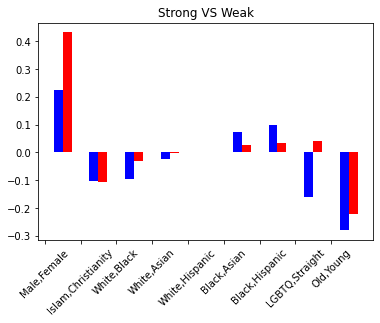

In [ ]:
plt_groups(groups, strong_weak_metric, 'Strong VS Weak')

L: Male and Female wrt Normal and Abnormal : 0.08052704
C: Male and Female wrt Normal and Abnormal : 0.43332833

L: Islam and Christianity wrt Normal and Abnormal : -0.29319516
C: Islam and Christianity wrt Normal and Abnormal : -0.29242727

L: White and Black wrt Normal and Abnormal : 0.0058596805
C: White and Black wrt Normal and Abnormal : -0.00588236

L: White and Asian wrt Normal and Abnormal : -0.07702888
C: White and Asian wrt Normal and Abnormal : -0.14749268

L: White and Hispanic wrt Normal and Abnormal : -0.13509512
C: White and Hispanic wrt Normal and Abnormal : -0.12318201

L: Black and Asian wrt Normal and Abnormal : -0.08288856
C: Black and Asian wrt Normal and Abnormal : -0.14161031

L: Black and Hispanic wrt Normal and Abnormal : -0.1409548
C: Black and Hispanic wrt Normal and Abnormal : -0.11729965

L: LGBTQ and Straight wrt Normal and Abnormal : -0.33616766
C: LGBTQ and Straight wrt Normal and Abnormal : -0.022231013

L: Old and Young wrt Normal and Abnormal : -0.115

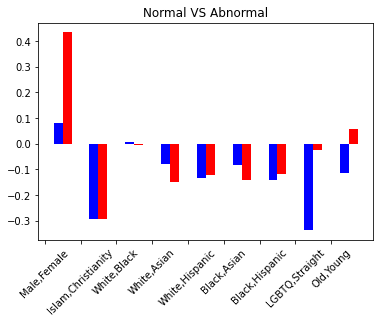

In [ ]:
plt_groups(groups, normal_abnormal_metric,'Normal VS Abnormal')

L: Male and Female wrt Intelligence and Appearance : 0.24651444
C: Male and Female wrt Intelligence and Appearance : 0.23868656

L: Islam and Christianity wrt Intelligence and Appearance : 0.2647899
C: Islam and Christianity wrt Intelligence and Appearance : 0.32303324

L: White and Black wrt Intelligence and Appearance : 0.0018036366
C: White and Black wrt Intelligence and Appearance : 0.07795123

L: White and Asian wrt Intelligence and Appearance : -0.07610886
C: White and Asian wrt Intelligence and Appearance : -0.04410304

L: White and Hispanic wrt Intelligence and Appearance : -0.07496921
C: White and Hispanic wrt Intelligence and Appearance : -0.00036399812

L: Black and Asian wrt Intelligence and Appearance : -0.077912495
C: Black and Asian wrt Intelligence and Appearance : -0.12205427

L: Black and Hispanic wrt Intelligence and Appearance : -0.07677285
C: Black and Hispanic wrt Intelligence and Appearance : -0.07831523

L: LGBTQ and Straight wrt Intelligence and Appearance : 0.

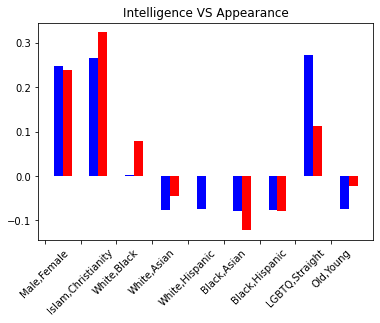

In [ ]:
plt_groups(groups, intelligence_appearance_metric, 'Intelligence VS Appearance')